In [1]:
# from IPython.display import Image
from PIL import Image
import pandas as pd

# Validation and overfitting

퍼블릭 리더보드에서 프라이빗 리더보드로 갔을 때 순위가 팍 떨어지는 경우가 있다.

1. validation을 안하고 퍼블릭에서 제일 점수 높은거로 낸 경우
2. 퍼블릭/프라이빗을 이상하게 나눈 경우


우리가 신경쓸 것은 1번. 이것을 competition에서의 overfitting이라고 한다.

- 일반적인 의미에서의 overfitting

training error << test error

- competition에서의 overfitting

기대한 error >> test error

# Validation strategies

validation을 하려면 데이터를 일단 나눠야함.

- 어떻게 나눠야할까?
- 몇개로 나눠야할까? 

### 어떻게 나눠야할까
- Holdout
    
    - 그냥 간단하게 train / validation 딱 2개로 나누는 것
    - 당연히 train/validation은 overlap되면 안되는데, duplicated record가 있다면 overlap될 수 있으니 주의해야함.
    - 데이터가 충분히 많을 때 / 다른 split을 했을 때 다 score가 비슷하다면 hold out 하는게 좋음.
    - sklearn.model_selection.ShuffleSplit

- K-fold

    - 데이터를 k개로 나누어서 하는 것. Hold out을 k번 하는 것과는 다름.
    - 데이터 수가 중간정도 일 때 / 여러 split에서 모델의 성능이 매우 다를 때 / 여러 split에서 hyperparameter가 많이 다를 때 좋음.
    - sklearn.model_selection.Kfold

- Leave-one-out

    - k=sample 개수 인 kfold.
    - 데이터가 매우 적을 때 유용. 근데 여태 단 한번도 써본적 음슴...

- stratification

    - 특정 class에 sample 적을 때 random split하면 망함.
    - 특히 데이터가 적을 때 / unbalanced dataset / Multiclass classification에 유용함
    - 좋은 classification data set은 그냥 shuffle split 이랑 층화 추출이랑 비슷함.
    
**validation으로 최적의 hyperparameter를 찾았고 이제 test prediction을 하고 싶다면, all training data로 retrain 하는 것을 잊지 마세욧**

# Data splitting strategies

train / test 가 split된 것과 다른 방식으로 train / validation을 split한다면, 그 model은 쓸모가 없다.

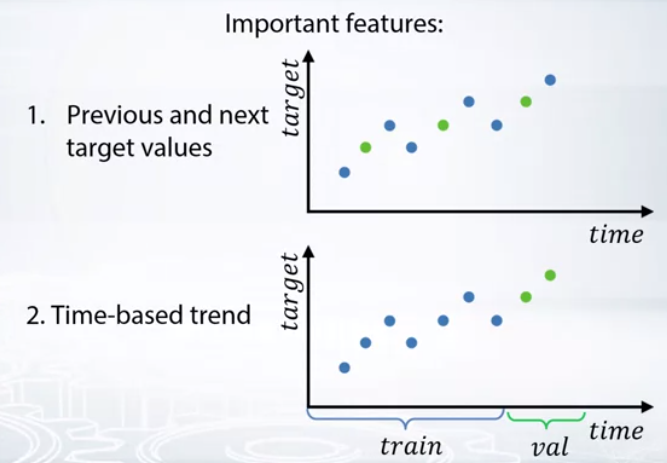

In [2]:
Image.open('img8.png')

train / validation split에 따라 중요한 feature가 다름. 중요한 feature는 다른 split에서는 좋은 성능을 내지 못함.

**적절한 split strategy를 정하고, 그에 맞는 feature를 생성한 후, 그 split으로 model을 학습시킨다**

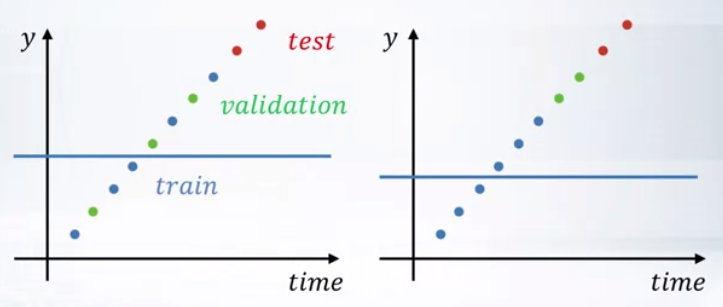

In [3]:
Image.open('img9.png')

모델의 예측값은 train 에서의 mean target value와 가깝게 만들어지게 되는데,

왼쪽 같은 경우는 validation point가 test point보다 더 좋은 score가 나올 것.

오른 쪽은 validation point와 test point의 score가 비슷 할 것.

**validation split 을 잘못하면 예측값 자체에 안 좋은 영향을 줄 수 있다**

### split strategies

- Random, rowwise

    - 가장 흔한 방법, 각 row가 독립일 때\
        예를 들면, 이 사람이 돈을 갚을지 안 갚을지 예측하는데 각 row가 사람 하나하나를 칭하는 것.
        독립이 아닌 경우는? 그 사람 중 가족이 있거나, 직장동료가 있거나.

- Timewise

    - 앞에서 봣듯이, 특정 시점 전의 training 데이터. 
    - 매우 좋은 feature를 만들 수 있음. 전주 동일 요일의 target값, 지난달의 target 평균 등등.
    - train/test split의 기준일을 옮겨가면서 하는 것이 moving window validation -> 기존에 내가 알던 timeseries split

- By id

    - 개인에게 음악을 추천해주는 문제라고 하자. train/test에는 같은 사람이 하나도 없을 것이다. 개인의 history에 관한 feature는 test에서 처음 보는 사람에게는 좋지 않은 feature다
    - train/test가 id based split했는데 random split을 하게되면 overfit 발생 
    

**잘 이해가안됨...**

# Problems occurring during validation

- validation 때 나타나는 문제
    - 보통 데이터의 모순 때문에 발생
        - 예시 : fold마다 optimal parameter가 다르게 나옴
        - 이 경우 validation을 더 철저하게 해야함
    
- submission 때 나타나는 문제
    - validation score랑 leaderboard score가 안맞는 경우
    - train / test split을 제대로 따라하지 못했기 때문에 발생.

### validation 때 나타나는 문제

*2월의 매출을 예측하는 문제가 있다. 그럼 train으로 전년도 몇달을 할거고, validation으로 1월을 하겠지. 근데 1월은 2월보다 휴일이 많기 때문에 매출이 더 나옴(선물세트). validation score는 안좋게, test score는 좋게 나올거임.이렇게 이유가 확실한 케이스 말고 다른 케이스는 뭐 있는지 보자*

- **너무 적은 데이터**
    - 데이터에 많은 패턴과 트렌드가 있을 때, 얘네를 geralize 할만큼 충분한 데이터가 없다. -> fold마다 각각 다른 패턴을 학습. 다른 score 야기.

- **너무 일관적이지 않은 데이터**
    - target값은 차이가 큰데, 설명변수들의 값이 비슷할 때, 모델은 혼란스러워한다.
        - 그 중 어떤건 train에 어떤건 validation에 있을 때. 에러가 커짐
        - 모두 다 validation에 있을 때, 에러는 작아짐.
    - 위의 매출 예측 문제와 비슷한 상황.
        - 이 상황이면, 1월로 validate할게 아니라, 그 전년도 꺼로 validate하는게 맞겟지

*어떻게 대처해야 하는가 : 좀 더 철저한 validation 방식이 필요함*

- KFold split을 random state로 여러번 한다음에 나온 값들을 평균. -> 더 stable한 결과가 나올 것.

- 한 KFold split으로는 optimal parameter 정하고, 다른 KFold split으로는 모델의 성능을 보는 방법.

### Submission 때 나타나는 문제
